In [6]:
%run ../Config/ImgConfig.ipynb
_ = HTML("""<style>.jp-OutputArea-output {display: table-cell;text-align: center !important;vertical-align: middle !important;}.jp-OutputArea-output img {width: 70% !important;}</style>""")

# 3. High Level System Design

[index](../Index.ipynb) | [prev](./02.LiteratureReview.ipynb) | [next](./04.DataCollection.ipynb)

The system design, proposed as part of this research, can be described as a two high level components:

- Real time frame processing used for object detection, and anomaly detection
- Batch processing used for forecasting, and other kind of anomaly detection

**Note:** This design is a proof of concept. Only individual components are developed as part of this research.

## 3.1. Real time frame processing

<a id="fig3.1"></a>
<p style="text-align: center; margin-bottom: 0;">Fig. 3.1. System Design - Real Time Processing</p>

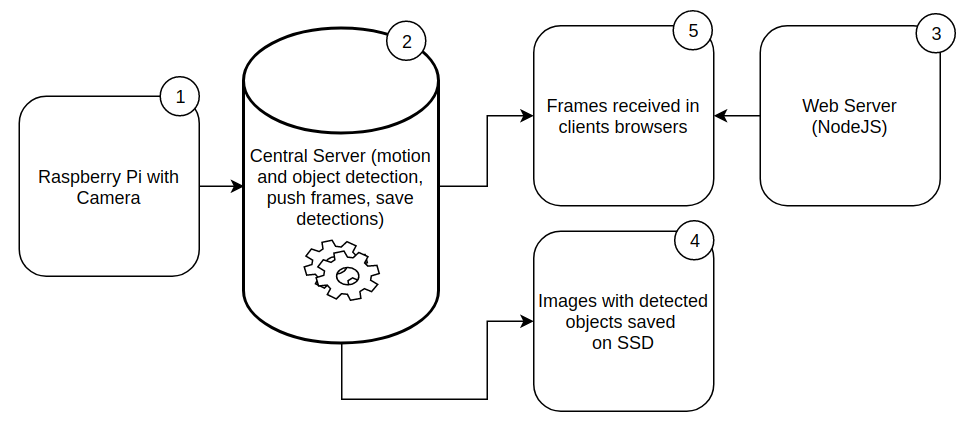

In [2]:
Image("../Resources/img/system-diagram-1.png")

**Diagram description:**

- Raspberry Pi camera (1) generates frames
- Frames, as *jpeg buffers*, flow to a Desktop PC via high performance message queue - ZMQ (2)
- Processing is applied to each frame:
    - resize, apply motion sensing, detect object classes and their $x,y$ coordinates
    - save images on SSD Drive (4), for further analysis and batch processing
    - emit all frames to connected end users (5)
- Client web browser application is served by NodeJS web server to render a UI (3)

The data flow is described in more detail in the [next chapter - Data Collection](./04.DataCollection.ipynb).

## 3.2 Batch processing

<p style="text-align: center; margin-bottom: 0;">Fig. 3.2. System Design - Batch Processing</p>

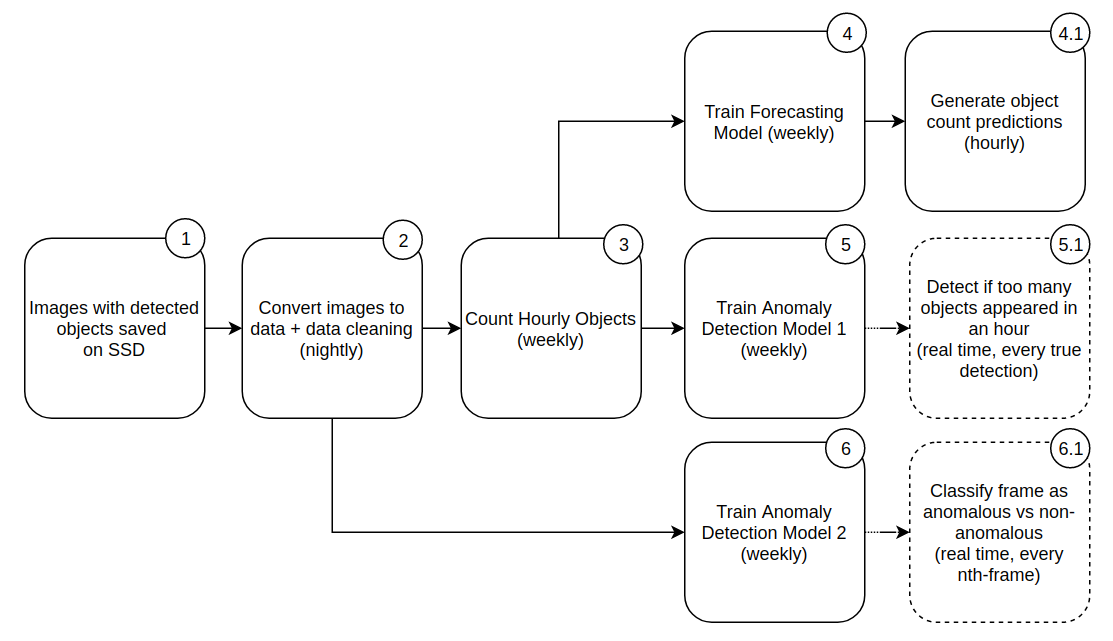

In [3]:
Image("../Resources/img/system-diagram-2.png")

**Diagram description:**

- Start with collection of raw images (1)
- Every night a scheduled task is executed, where images from the whole day are converted into a tabular dataset (2)
- Then in step 3, another scheduled task runs once every week and counts unique observations into hourly buckets and this dataset is used by two processes: 
    - Weekly training of a Machine Learning model (4), used for forecasting
    - New predictions are generated every hour (4.1) for next three days
    - Weekly anomaly detection training script (6), used to set up hourly thresholds, above which new objects are treated as anomalies \[this anomaly verification runs in real time (5.1)\]
- Tabular dataset with raw image pixel intensities, is used to train an auto-encoder model, capable of classifying frames as anomalous (6) \[the classification occurs in real time (box 6.1)\]

Details for each process are covered in chapters [Forecasting](05.Forecasting.ipynb), and [Anomaly Detection](./06.AnomalyDetection.ipynb).

## 3.3. Conclusion

This chapter served a high level overview of the system design.

Next Chapter contains more detail for the Figure 3.1. rendered above.

[index](../Index.ipynb) | [prev](./02.LiteratureReview.ipynb) | [next](./04.DataCollection.ipynb)